In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

## Let's imagine a scenario where the data of **Number of students getting placed per day** in a university for the past 14 Years or 14 x 300 = 4200 days, is collected and the data looks like the following:

In [45]:
placements_per_day = np.random.poisson(lam=5,size=4200)

In [46]:
print(placements_per_day)

[4 6 4 ... 5 4 5]


### Let's compute the unique values in this data. 

In [47]:
X = np.unique(placements_per_day)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### Let's compute the relative frequency of these different values in the dataset. 

In [48]:
relative_frequency = list()

for x in X:
    relative_frequency.append(np.count_nonzero(placements_per_day == x)/placements_per_day.shape[0])

print(relative_frequency)

[0.008571428571428572, 0.03166666666666667, 0.08190476190476191, 0.1488095238095238, 0.16357142857142856, 0.17142857142857143, 0.1530952380952381, 0.10571428571428572, 0.06571428571428571, 0.039523809523809524, 0.017142857142857144, 0.008809523809523809, 0.002619047619047619, 0.0011904761904761906, 0.0002380952380952381]


### Let's create a table of relative frequency of these different values:

$$
\Large
\begin{array}{|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{Relative Frequency, RF(k)}\\
\hline
0 & 0.0071 \\
1 & 0.0319 \\
2 & 0.0876 \\
3 & 0.1509 \\
4 & 0.1669 \\
5 & 0.1745 \\
6 & 0.1480 \\
7 & 0.0945 \\
8 & 0.0685 \\
9 & 0.0402 \\
10 & 0.0171 \\
11 & 0.0071 \\
12 & 0.0026 \\
13 & 0.0021 \\
14 & 0.0004 \\
\hline
\end{array}
$$

### If we plot the this data, then we get:

<BarContainer object of 15 artists>

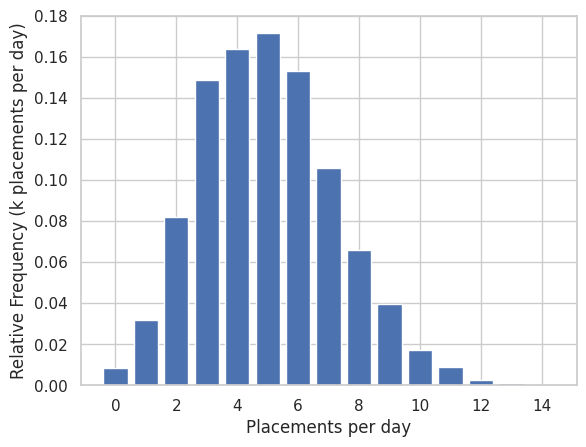

In [49]:
plt.xlabel("Placements per day")
plt.ylabel("Relative Frequency (k placements per day)")
plt.bar(np.unique(placements_per_day),relative_frequency)

## The distribution looks very much like a Binomial Distribution and similar to the scenario of Binomial Distribution of $N=14$ students sitting for a placement drive and we have $k$ $(0 \le k \le N)$ out of $N=14$ students getting placed in a drive and remaining $(N-k)$ students not getting placed.

# **But does it really ????**

### In order to verify this, let's compute the probabilities of $k$ students getting placed out of $N=14$ students, using the PDF of the Binomial Distribution:


$$
\Large
P(k/14) = 14_{C_k}\cdot{(p)^k}\cdot{(1-p)^{(14-k)}}
$$

## Where $p$ and $(1-p)$ is the **probability of getting a single student getting placed and not placed, respectively.**

### But the problem is that how to determine the value of $p$ ???

## If the discussion of Binomial Distribution is recalled then we already know that the value having highest probability, is the mean of the Binomial Distribution, therefore if we are assuming that the above distribution looks like Binomial Distribution then, $\mu = (N\cdot{p}) = 5$, therefore: 

##
$$
\Large
\mu = (N\cdot{p}) = 5 \\
(N\cdot{p}) = (14\cdot{p}) = 5 \\
p = \left(\frac{5}{14}\right)
$$

### Therefore, the probabilities will be computed using the PDF of Binomial Distribution as:

$$
\Large
P(k/14) = 14_{C_k}\cdot{\left(\frac{5}{14}\right)^k}\cdot{\left(1-\frac{5}{14}\right)^{(14-k)}}
$$

### So, let's compute the probabilities now. 

In [50]:
p_k_out_of_N = s.binom.pmf(np.unique(placements_per_day),14,5/14)

In [51]:
p_k_out_of_N

array([2.05874536e-03, 1.60124639e-02, 5.78227863e-02, 1.28495081e-01,
       1.96311929e-01, 2.18124365e-01, 1.81770304e-01, 1.15409717e-01,
       5.61019458e-02, 2.07784984e-02, 5.77180512e-03, 1.16602124e-03,
       1.61947394e-04, 1.38416576e-05, 5.49272127e-07])

### Now, let's augment these probabilities in the table above to compare that whether these probabilities are coming out to be same as that of the probabilities mentioned above in the table. 

$$
\Large
\begin{array}{|c|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{RF(k)} & \textbf{P(k/14)}\\
\hline
0 & 0.0071 & 0.002058\\
1 & 0.0319 & 0.01601\\
2 & 0.0876 & 0.05782\\
3 & 0.1509 & 0.1284\\
4 & 0.1669 & 0.1963\\
5 & 0.1745 & 0.2181\\
6 & 0.1480 & 0.1817\\
7 & 0.0945 & 0.1154\\
8 & 0.0685 & 0.056\\
9 & 0.0402 & 0.02077\\
10 & 0.0171 & 0.00577\\
11 & 0.0071 & 0.00116\\
12 & 0.0026 & 0.0001619\\
13 & 0.0021 & 0.00001384\\
14 & 0.0004 & 0.0000005492\\
\hline
\end{array}
$$

## It can be clearly observed that **there is a huge difference between observed probabilities, $P(X=k)$ and Binomial Probabilities, $P(k/14)$**. 

## And, this difference can be observed in the following plot more visibly. 

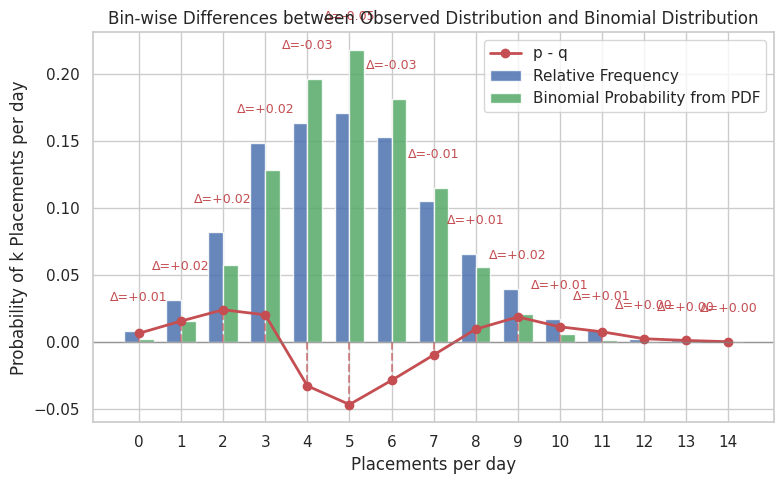

In [52]:
categories = np.unique(placements_per_day)  # categorical bins [web:1][web:2]
p = np.array(relative_frequency)   # distribution 1 probabilities (sum to 1) [web:3]
q = p_k_out_of_N   # distribution 2 probabilities (sum to 1) [web:3]

# Compute differences (p - q)
diff = p - q  # signed bin-wise difference to visualize fit mismatch [web:6][web:11]

sns.set(style="whitegrid")  # clean categorical style [web:1]

x = np.arange(len(categories))
w = 0.35  # bar width [web:11]

fig, ax = plt.subplots(figsize=(8, 5))

# Side-by-side bars using matplotlib.pyplot.bar
ax.bar(x - w/2, p, width=w, label="Relative Frequency", color='#4C72B0', alpha=0.85)  # grouped bars [web:11]
ax.bar(x + w/2, q, width=w, label="Binomial Probability from PDF", color='#55A868', alpha=0.85)  # grouped bars [web:11]

# Difference markers (signed), to show goodness-of-fit at each category
ax.plot(x, diff, color='#C44E52', marker='o', linewidth=2, label='p - q')  # overlay difference [web:6][web:11]
for xi, d in zip(x, diff):
    ax.vlines(xi, 0, d, color='#C44E52', linestyles='dashed', alpha=0.6)  # vertical guide to show magnitude [web:6]

# Zero line for reference
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)  # baseline for signed differences [web:6]

# Labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(categories)  # categorical labels [web:1][web:2]
ax.set_xlabel("Placements per day")
ax.set_ylabel("Probability of k Placements per day")  # bar heights represent probabilities [web:3]
ax.set_title("Bin-wise Differences between Observed Distribution and Binomial Distribution")  # grouped comparison [web:8]
ax.legend()

# Optional: annotate absolute differences above bars
for xi, pi, qi in zip(x, p, q):
    d = pi - qi
    ax.text(xi, max(pi, qi) + 0.02, f"Δ={d:+.2f}", ha='center', va='bottom', fontsize=9, color='#C44E52')  # annotate diff [web:8]

plt.tight_layout()
plt.show()

## Therefore, **the above first table of observed probabilities, is not Binomial Distribution.**

# Then, what distribution it is ???

# **It is actually Poisson Distribution.**

# It's **PDF is given as:**

$$
\Huge
\boxed{P(X=k) = \frac{e^{-\lambda} \cdot{\lambda^k}}{k!}}
$$

### Where, $\lambda = \text{Mean of the Poisson Distribution (Shape Parameter)}$

### Therefore, $\lambda=5$ in our case as it's having the highest probability. Therefore, we can say that the probability of $k$ students getting placed per day is given as:

$$
\Large
P(X=k) = \frac{e^{-5}\cdot{5^k}}{k!}
$$

### Let's compute all the probabilities for different values of number of placements per day according to the PDF of Poisson Distribution, having $\lambda=5$.

In [53]:
p_x_equals_k = s.poisson.pmf(np.arange(0,15),5)

In [54]:
p_x_equals_k

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558,
       0.01813279, 0.00824218, 0.00343424, 0.00132086, 0.00047174])

### Let's augment these probabilities with the table above to perform the comparison that whether these computed probabilities are matching with the observed probabilities computed from the data as relative frequencies.

$$
\large
\begin{array}{|c|c|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{RF} & \textbf{P(k/14)} & \textbf{P(X=k) from Poisson PDF}\\
\hline
0 & 0.0071 & 0.002058 & 0.006737\\
1 & 0.0319 & 0.01601 & 0.033\\
2 & 0.0876 & 0.05782 & 0.0842\\
3 & 0.1509 & 0.1284 & 0.1403\\
4 & 0.1669 & 0.1963 & 0.1754\\
5 & 0.1745 & 0.2181 & 0.1754\\
6 & 0.1480 & 0.1817 & 0.1462\\
7 & 0.0945 & 0.1154 & 0.1044\\
8 & 0.0685 & 0.056 & 0.0652\\
9 & 0.0402 & 0.02077 & 0.0362\\
10 & 0.0171 & 0.00577 & 0.0181\\
11 & 0.0071 & 0.00116 & 0.00824\\
12 & 0.0026 & 0.0001619 & 0.0034\\
13 & 0.0021 & 0.00001384 & 0.0013\\
14 & 0.0004 & 0.0000005492 & 0.0004\\
\hline
\end{array}
$$

## It can be clearly observed that **there is a very slight difference between observed probabilities (relative frequencies), $P(X=k)$ and Poisson Probabilities, $\text{P(X=k) from Poisson PDF}$**. 

## And, this minute slight difference can be observed in the following plot more visibly. 

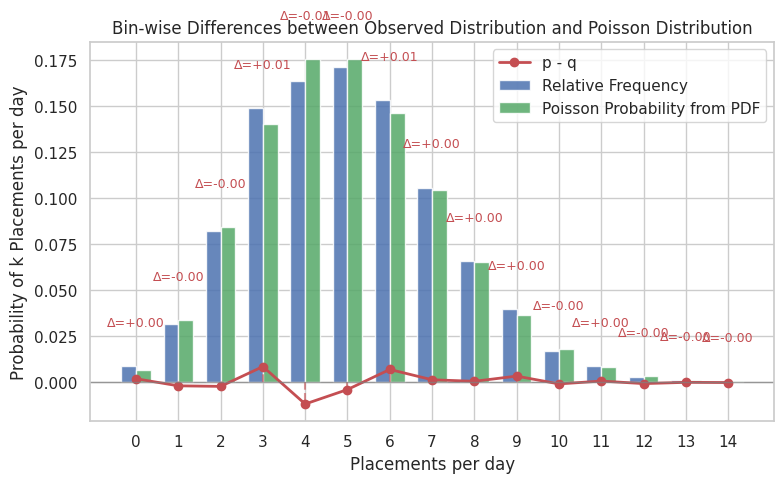

In [55]:
categories = np.unique(placements_per_day)  # categorical bins [web:1][web:2]
p = np.array(relative_frequency)   # distribution 1 probabilities (sum to 1) [web:3]
q = p_x_equals_k   # distribution 2 probabilities (sum to 1) [web:3]

# Compute differences (p - q)
diff = p - q  # signed bin-wise difference to visualize fit mismatch [web:6][web:11]

sns.set(style="whitegrid")  # clean categorical style [web:1]

x = np.arange(len(categories))
w = 0.35  # bar width [web:11]

fig, ax = plt.subplots(figsize=(8, 5))

# Side-by-side bars using matplotlib.pyplot.bar
ax.bar(x - w/2, p, width=w, label="Relative Frequency", color='#4C72B0', alpha=0.85)  # grouped bars [web:11]
ax.bar(x + w/2, q, width=w, label="Poisson Probability from PDF", color='#55A868', alpha=0.85)  # grouped bars [web:11]

# Difference markers (signed), to show goodness-of-fit at each category
ax.plot(x, diff, color='#C44E52', marker='o', linewidth=2, label='p - q')  # overlay difference [web:6][web:11]
for xi, d in zip(x, diff):
    ax.vlines(xi, 0, d, color='#C44E52', linestyles='dashed', alpha=0.6)  # vertical guide to show magnitude [web:6]

# Zero line for reference
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)  # baseline for signed differences [web:6]

# Labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(categories)  # categorical labels [web:1][web:2]
ax.set_xlabel("Placements per day")
ax.set_ylabel("Probability of k Placements per day")  # bar heights represent probabilities [web:3]
ax.set_title("Bin-wise Differences between Observed Distribution and Poisson Distribution")  # grouped comparison [web:8]
ax.legend()

# Optional: annotate absolute differences above bars
for xi, pi, qi in zip(x, p, q):
    d = pi - qi
    ax.text(xi, max(pi, qi) + 0.02, f"Δ={d:+.2f}", ha='center', va='bottom', fontsize=9, color='#C44E52')  # annotate diff [web:8]

plt.tight_layout()
plt.show()

# Always remember that, **no matter if the two distributions look similar but there can be a huge difference between them in terms of the probabilities of occurrence of different events**.

# And also always remember that, **Poisson Distribution will always be used to model data of Frequency of occurrence of any phenomena per unit of time (second, minute, hour, day, week, month, year) or per unit of space (mm, cm, m, km, mm $^2$, cm $^2$, m $^2$, km $^2$, mm $^3$, cm $^3$, m $^3$)**.

# In our case, it was Number of Placements **PER DAY (that is per unit of time)**.

# Okay lets move ahead

# So our next distribution is quite **NORMAL !!**

# Well, The **Normal Distribution**

## so it is a distribution of **Continuous Random Variable**  Well, continuous random variable simply contain decimal / floating point values, and normal is always bell shaped. 

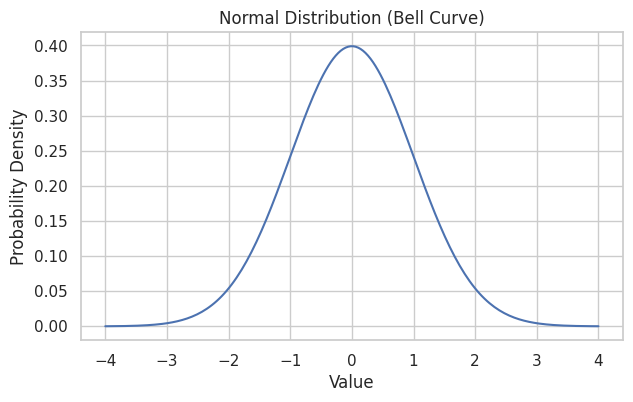

In [56]:
mu, sigma = 0, 1 
x_vals = np.linspace(-4, 4, 200)
y_vals = s.norm.pdf(x_vals, mu, sigma)

plt.figure(figsize=(7, 4))
plt.plot(x_vals, y_vals)
plt.title("Normal Distribution (Bell Curve)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

## well dont worry about **mu, and sigma** you will see it soon 

## It is **Interesting** because you've already seen bell shaped distribution at several places **(in case of binomial and poisson distribution)**

## therefore if **binomial and poisson distribution can also be symmetric, then what is the difference between binomial, poisson and normal distribution ?**

## Well, there are two main difference :- 1. Normal distribution is for **continuous random variable** and the remaining two (binomial and poisson) are for **discrete random variable**
## And second is normal distribution is **always symmetric irrespective of changes in its parameters.** while remaining two can be **symmetric or skewed.**

## Lets move further and understand the **PDF** of Normal Distribution

## But Wait !! in order to understand the **PDF** of Normal Distribution, we must understand some **Descriptive Statistics**.

## **Descriptive statistics** are used to describe the basic features of data in a study. They are used to provide quantitative description in a manageable form.
## Some important descriptive statistics to understand normal distribution includes :- **Mean, Standard Deviation, and Variance**

## Lets understand by taking a simple example
## Suppose, you are building a **cricket team**, and you want to select a batsman for your team and **you want to select the batsman with good average strike rate.**

## Now suppose, you have 2 players, and both players have played **only 10 matches** and both have a **good average strike rate of 70.** Now which batsman to choose for your team ?

## First lets take a question:- **Why average (Mean) !!! ?**
## Suppose the scores made by 2 players in their last 10 matches is given as:-
## **Player 1:** `[70, 40, 100, 20, 120, 0, 80, 40, 0, 230]`
## **Player 2:** `[60,45,65,75,70,55,40,55,80,155]`
## **Mean (Average strike rate)** of both the players is given by :- 
$$
\large
\mu player1 = \frac{70 + 40 + 100 + 20 + 120 + 0 + 80 + 40 + 0 + 230}{10} = 70
$$

$$
\large
\mu player2 = \frac{60 + 45 + 65 + 75 + 70 + 55 + 40 + 55 + 80 + 155}{10} = 70
$$

## if observed carefully that the **Mean** gives a very good idea about the **range of majority of the values lying in the data, such as in the data of runs scored by batsman in their 10 matches.** 
## Therefore it can be said that the data of all the matches is not needed to judge the player but simply **the avg. strike rate is required** because **if the Average (Mean) is high, then the player would have scored runs nearly average in most of the matches and hence that player should be selected.**

## lets say player one is choosen.
## **Player 1:** `[70, 40, 100, 20, 120, 0, 80, 40, 0, 230]`
## **Player 2:** `[60,45,65,75,70,55,40,55,80,155]`
## But, there is a twist !!, Don't you think there may be the case that player1 can score 0 runs in the next match because **this player 1 has scored 0 runs in some matches, and he can also score very high in the next match as he scored 230 runs in a match too.**

## So, we can say that the **performance of player 1 is very uncertain as he is not consistent !!** therefore a player with **good average strike rate as well as good consistency is required**   
## So a **Metric** is required to measure consistency too !!

## So what would be the scenario with player having average strike rate of 70 and good consistency ? The most consistent player would have made 70 runs in all the past 10 matches:-
## `[70, 70, 70, 70, 70, 70, 70, 70, 70, 70]`

## So lets see by how much runs at an average both players are off from the ideal consistent behaviour of 70 runs in each match:-
$$
\sigma_{Player\,1} = \sqrt{\frac{(70-70)^2 + (40-70)^2 + (100-70)^2 + (20-70)^2 + (120-70)^2 + (0-70)^2 + (80-70)^2 + (40-70)^2 + (0-70)^2 + (230-70)^2}{10}}
$$

$$
= \sqrt{\frac{43{,}200}{10}} = \sqrt{4{,}320} \approx 65.73 \ \text{runs}
$$

---

$$
\sigma_{Player\,2} = \sqrt{\frac{(60-70)^2 + (45-70)^2 + (60-70)^2 + (75-70)^2 + (70-70)^2 + (55-70)^2 + (40-70)^2 + (55-70)^2 + (80-70)^2 + (155-70)^2}{10}}
$$

$$
= \sqrt{\frac{9{,}525}{10}} = \sqrt{952.5} \approx 30.74 \ \text{runs}
$$

## As you can observe that player 2 is more **consistent** because **he is off by 30.74 runs at an average per match from the most consistent behaviour of 70 runs in every match. And that is why player 2 should be selected.**
## Now lets know what we have just calculated through which we got our answers easily.
## The quantity which is just evaluated is called **Standard Deviation** denoted as:-(sigma)
$$
\large
\sigma
$$
## And is defined as **the average deviation of a single observation of a Random variable from mean.**
## In layman terms, it is a **metric which measures the fluctuation in the data (How much each observation in the data is going off up and down across the mean.)**

## See !! it is simple, So do the **Variance**
## **Variance** is simply the **square of standard deviation**.
## it is a metric which **measures the spreadness of the values or the range till which the values have been spread.**

## Range is the **difference between the lowest value of observation and highest value of the observation. More difference between lowest value and highest value, more will be range, more will be spreadness and hence more will be the variance of data.**

## **Lets Visualise the Normal Distribution**

## Knowing Mean, Standard Deviation and Variance gives a detailed description of the data and therefore they are **descriptive statistics.**
## Lets take an example:-
## Lets collect the data of **sample of 100 people** for their **Weights (in kgs).**  Suppose, **the minimum weight of the person observed was 40 kgs and maximum weight observed was 120 kgs.**

## Lets plot the frequency distribution all the **100 observations**. 
## Lets **divide** the overall range from **40 kg to 120 kg into 8 bins**. The range of **8 bins** will be as:-

$$
\large
\begin{array}{|c|c|}
\hline
\textbf{Bin No.} & \textbf{Class Interval (kg)} \\
\hline
1 & 40 - 50 \\
2 & 50 - 60 \\
3 & 60 - 70 \\
4 & 70 - 80 \\
5 & 80 - 90 \\
6 & 90 - 100 \\
7 & 100 - 110 \\
8 & 110 - 120 \\
\hline
\end{array}
$$


## So the X-axis of the frequency distribution is divided into **8 bins** with each bin having a width of **10 kgs**
## This has resulted into following frequency distribution :-

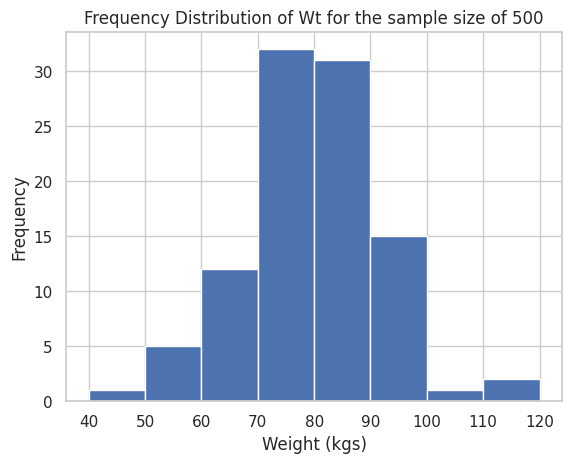

In [57]:
N = 100
sample = np.random.normal(loc=80,scale=15,size=N)
plt.figure(facecolor='white')
plt.hist(sample,bins=8,range=(40,120))
plt.title(f'Frequency Distribution of Wt for the sample size of 500')
plt.xlabel('Weight (kgs)')
plt.ylabel('Frequency')
plt.show()

## Note that this frequency distribution is plotted by **looking that an observed value of a RV weight.**
## **Each time we increase the number of frequency of that bin in which our observed value(weight) is supposed to lie**

## Now, lets increase the **sample size to 500** and lets decrease the **bin width to 5 kgs**, therefore doubling the number of bins to **16** and making each bin **thinner than before**.

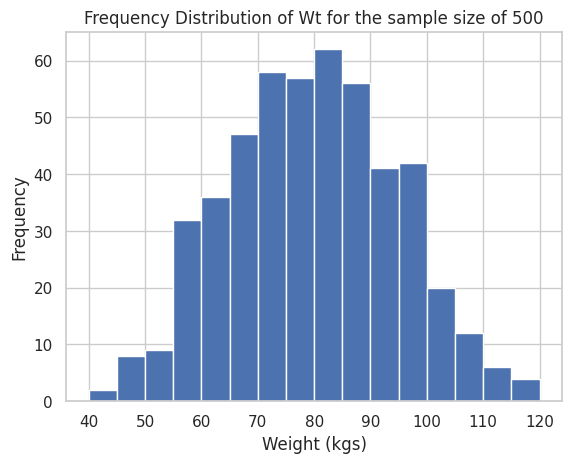

In [58]:
N = 500
sample = np.random.normal(loc=80,scale=15,size=N)
plt.figure(facecolor='white')
plt.hist(sample,bins=16,range=(40,120))
plt.title(f'Frequency Distribution of Wt for the sample size of 500')
plt.xlabel('Weight (kgs)')
plt.ylabel('Frequency')
plt.show()

## Now lets increase the sample size to **10000** and lets **decrease the bin width to 2.5 kgs, thereby doubling the no. of bins to 32 and making each bin thinner than before**.

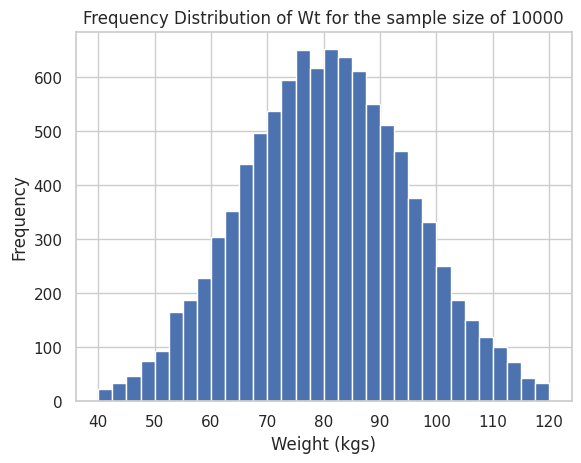

In [59]:
N = 10000
sample = np.random.normal(loc=80,scale=15,size=N)

plt.figure(facecolor='white')
plt.hist(sample,bins=32, range=(40,120))
plt.title(f'Frequency Distribution of Wt for the sample size of 10000')
plt.xlabel('Weight (kgs)')
plt.ylabel('Frequency')
plt.show()

## Now lets **increase the size to 1000000 and lets decrease the bin width to almost 0 kgs, thereby increasing the no. of bins to 100  (for sake of understanding lets assume it as infinity and making each bin with 0 bin width, thinner of all !!** )

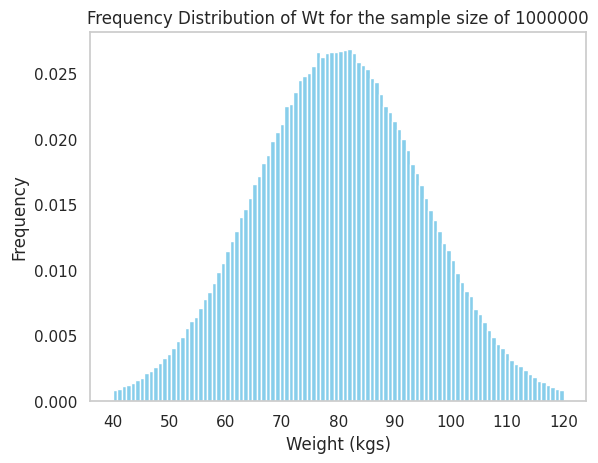

In [71]:
N = 1000000
sample = np.random.normal(loc=80, scale=15, size=N)

plt.figure(facecolor='white')
plt.hist(sample, bins=100, range=(40, 120), color='skyblue', density=True)  
plt.title('Frequency Distribution of Wt for the sample size of 1000000')
plt.xlabel('Weight (kgs)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## if the frequency of each bin of zero width is divided by 1 million, then **we get the Normal Probability Distribution**, with probability of each value of RV(X) on y-axis.

## Lets try to visualise that, how the **family of curves** of Normal Probability Distribution looks like

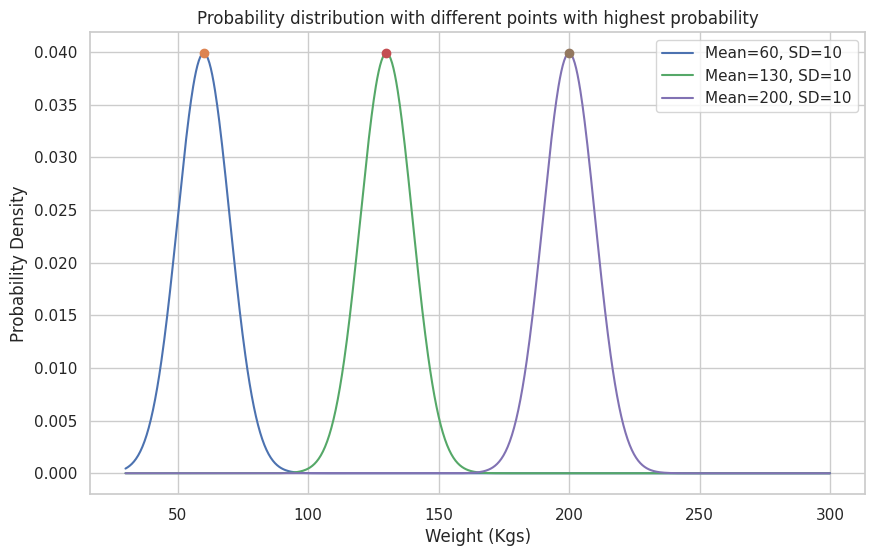

In [ ]:
from scipy.stats import norm

x = np.linspace(30, 300, 1000)

params = [
    (60, 10),
    (130, 10),
    (200, 10),
]

plt.figure(figsize=(10, 6))

for mu, sigma in params:
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, label=f'Mean={mu}, SD={sigma}')
    # Mark peak (highest probability point)
    plt.plot(mu, norm.pdf(mu, loc=mu, scale=sigma), 'o')

plt.title('Probability distribution with different points with highest probability')
plt.xlabel('Weight (Kgs)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## Three Normal Distribution curves with **different values having highest probability, this giving family of curve**
## Lets try to visualise, in what other way the family of curves of normal probability distribution can be obtained and how they will look like

## First, **Three Normal Distribution curves with different ranges of values of RV on the x-axis but same value with highest probability**.

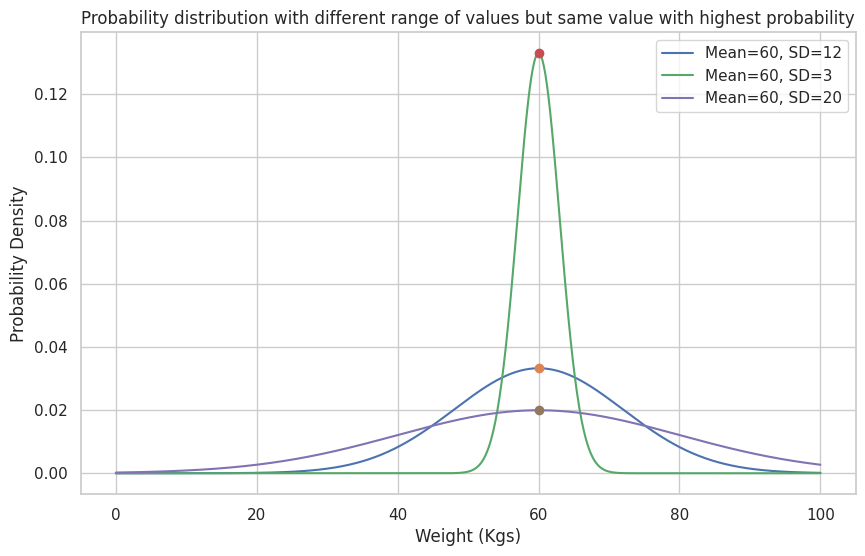

In [83]:
from scipy.stats import norm

x = np.linspace(0, 100,1000)

params = [
    (60, 12),
    (60, 3),
    (60, 20),
]

plt.figure(figsize=(10, 6))

for mu, sigma in params:
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, label=f'Mean={mu}, SD={sigma}')
    # Mark peak (highest probability point)
    plt.plot(mu, norm.pdf(mu, loc=mu, scale=sigma), 'o')

plt.title('Probability distribution with different range of values but same value with highest probability')
plt.xlabel('Weight (Kgs)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## Second, **Three Normal Distribution curves with different range of values of RV on the X-axis as well as different values with highest Probability**.

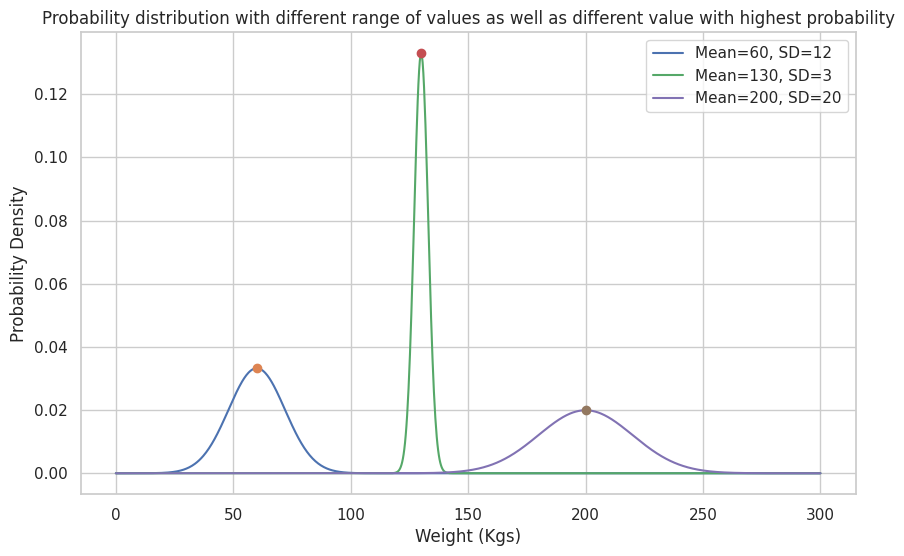

In [88]:
x = np.linspace(0, 300,1000)

params = [
    (60, 12),
    (130, 3),
    (200, 20),
]

plt.figure(figsize=(10, 6))

for mu, sigma in params:
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, label=f'Mean={mu}, SD={sigma}')
    # Mark peak (highest probability point)
    plt.plot(mu, norm.pdf(mu, loc=mu, scale=sigma), 'o')

plt.title('Probability distribution with different range of values as well as different value with highest probability')
plt.xlabel('Weight (Kgs)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## So it can be easily observed that there will be two parameters in the **PDF of Normal Distribution**
## One related to the **range of the distribution, which is making a distribution compress or stretch on x-axis**, and other related to the **value with highest probability, which is shifting the hump of distribution on x-axis**.

## it is obvious that  the first parameter which is responsible for the **spreadness of the distribution is Variance or Standard Deviation**.

## Lets try to understand what can be other parameter.
## Lets take **16 values** of a RV X:-
## X: `[10,20,20,30,30,30,40,40,40,40,50,50,50,60,60,70]`
## Lets have look on Frequency distribution of X 

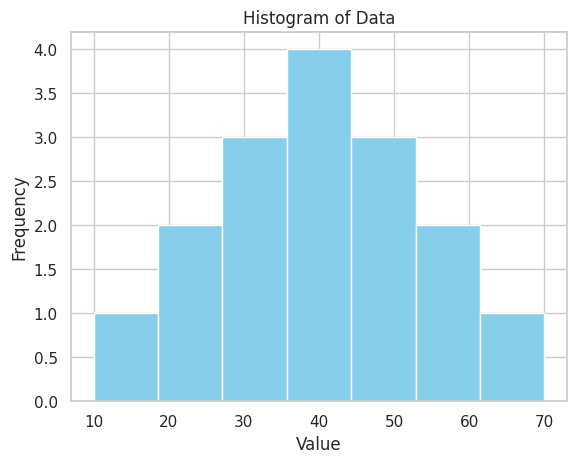

In [93]:
data = [10,20,20,30,30,30,40,40,40,40,50,50,50,60,60,70]

plt.hist(data, bins=7, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


## lets calculate mean of this freq distribution:-
$$
\large
\mu {x} = \frac{1 \times 10 + 2 \times 20 + 3 \times 30 + 4 \times 40 + 3 \times 50 + 2 \times 60 + 1 \times 70}{10} = \frac{640}{16} = 40
$$

## As we can observe that, the **mean of all observation is equal to 40, the value with highest frequency.** Therefore the **value with highest probability in Normal Distribution is called Mean.**

## So the two parameters of Normal Distribution are **Mean** and **Standard Deviation** and the **PDF** of Normal Distribution is given as:-
$$
\huge
P(X=k) = \frac{1}{\sqrt{2 \pi\sigma}} e^{-\frac{(k-\mu)^2}{2\sigma^2}}
$$
## where mu = **Mean** and sigma = **Standard deviation**, the two parameters of this distribution


## if Mean is changed, then the **hump of the distribution will shift on the x-axis.**
## If Std dev. is reduced then it will **compress the distribution and if it is increase, then it will expand the Distribution**

## lets revisit the family

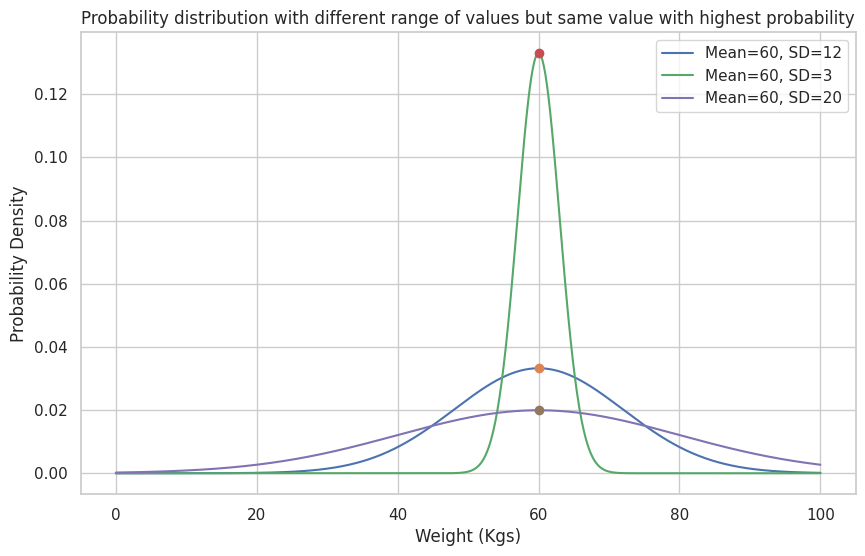

In [94]:
from scipy.stats import norm

x = np.linspace(0, 100,1000)

params = [
    (60, 12),
    (60, 3),
    (60, 20),
]

plt.figure(figsize=(10, 6))

for mu, sigma in params:
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, label=f'Mean={mu}, SD={sigma}')
    # Mark peak (highest probability point)
    plt.plot(mu, norm.pdf(mu, loc=mu, scale=sigma), 'o')

plt.title('Probability distribution with different range of values but same value with highest probability')
plt.xlabel('Weight (Kgs)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## All the three distribution have **different std deviation of 12, 3, and 20 kgs. but same mean of 60 kgs.**

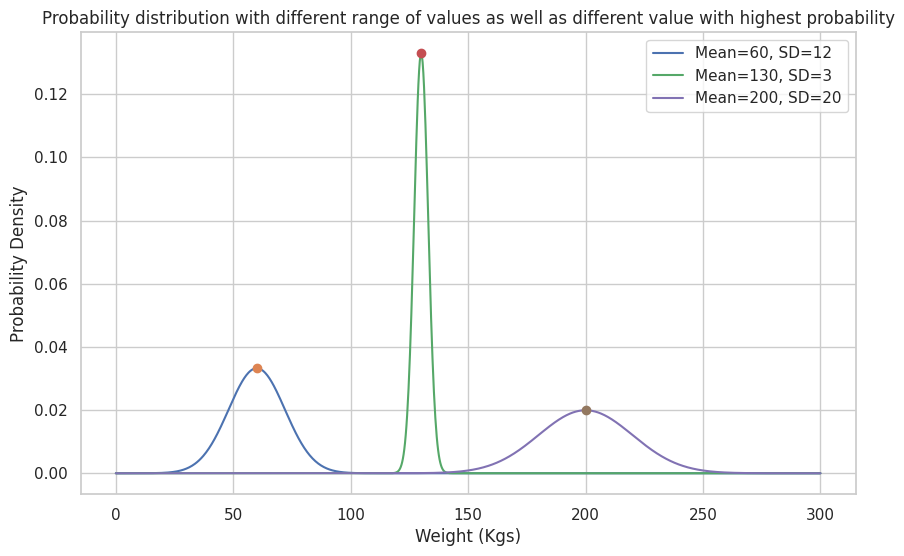

In [95]:
x = np.linspace(0, 300,1000)

params = [
    (60, 12),
    (130, 3),
    (200, 20),
]

plt.figure(figsize=(10, 6))

for mu, sigma in params:
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, label=f'Mean={mu}, SD={sigma}')
    # Mark peak (highest probability point)
    plt.plot(mu, norm.pdf(mu, loc=mu, scale=sigma), 'o')

plt.title('Probability distribution with different range of values as well as different value with highest probability')
plt.xlabel('Weight (Kgs)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## In this case, **all the three distribution have different std dev. of 12,3,and 20 as well as means of 60,130,and 200 kgs**

## Some **important observation** about normal distribution
## 1. Normal Distribution is also known as **Gaussian Distribution** because of the **gaussian function** used in PDF of normal distribution
$$
\huge
P(X=k) = \frac{1}{\sqrt{2 \pi\sigma}} e^{-\frac{(k-\mu)^2}{2\sigma^2}}
$$
## 2. when **standard deviation of normal distribution is decreases, the height of the distribution increases and vice versa.**
## This happens because the **area under the curve** of the Normal Distribution (Total Probaility) will always be equal to 1 and therefore, **in any scenario, the area will always be equal to 1 and constant.**

# Lets Move Ahead

## lets talk about **Multivariate Normal Distribution**
## But Wait Again !!! To understand this we have to look on **slightly different perspective on Joint Probability**.
## **Joint Probability** ?? What's the role of this thing ?? we'll see this soon.

## well, **Joint Probabililty** is the probability of **occurrence of two events together and at the same point in time**. **Joint Probability** is the probability of event y occurring while event X occurs.

## For example:- what would be the **probability of selecting one person whose heights equals to 157.5cm and weightequals to 58.5 kg ?**
## That is :-
$
\huge
P(X = 157.5 cm \, \cap \ Y = 58.5 kg)$

## Ok you got it now tell me that what would be the probability of **selecting one person whose height equals 157.5 cm and weights equals 58.5 kg and going to have an ice-cream** ? Any Answers
## well that is going to be :-
$
\huge
P(X = 157.5 cm \, \cap \ Y = 58.5 kg \, \cap \ Z = have icecream)$

## Now if you observe here, **height** and **weight** are from normal distribution and **ice-cream** variable is from binomial distribution.
## Therefore, we can calculate their individual probability through their **PDFs** and consider them together:
$$
\huge
\frac{1}{\sqrt{2 \pi\sigma}} e^{-\frac{(157.5 cm-\mu)^2}{2\sigma^2}} \ \cap \ \frac{1}{\sqrt{2 \pi\sigma}} e^{-\frac{(58.5 kg-\mu)^2}{2\sigma^2}} \ \cap \ (p)^{1} (q)^{(1-1)}
$$


## Lets understand the Multivariate normal distribution
## So tell me what is the **probability of selecting one person whose height equals to 157.5 cm and weight equals to 58.5 kg and have eye-sight equals to +1.22** ?
$
\huge
P(X = 157.5 cm \ \cap \ Y = 58.5 kg \ \cap \ Z = +1.22)
$

## As you can see that above-mentioned random variables are usually **normal/Gaussian Distributed and Independent**.
## So using the **PDFs** we get:-

$$
\huge
\frac{1}{\sqrt{2 \pi\sigma x}} e^{-\frac{(k-\mu x)^2}{2\sigma x^2}} \ \cap \ \frac{1}{\sqrt{2 \pi\sigma y}} e^{-\frac{(k-\mu y)^2}{2\sigma y^2}} \ \cap \ \frac{1}{\sqrt{2 \pi\sigma z}} e^{-\frac{(k-\mu x)^2}{2\sigma z^2}}
$$
## calculating further
$$
\huge
\frac{1}{\sqrt{2 \pi\sigma x}} e^{-\frac{(157.5 cm-\mu x)^2}{2\sigma x^2}} \ * \ \frac{1}{\sqrt{2 \pi\sigma y}} e^{-\frac{(58.5 kg-\mu y)^2}{2\sigma y^2}} \ * \ \frac{1}{\sqrt{2 \pi\sigma z}} e^{-\frac{(+1.22-\mu x)^2}{2\sigma z^2}}
$$
## we can write this as:
$$
\huge
\frac{1}{(\sqrt{2\pi})^3\, \sigma_x \, \sigma_y \, \sigma_z} \, e^{-\frac{1}{2} \left[\frac{(157.5 - \mu_x)^2}{\sigma_x^2} + \frac{(58.5 - \mu_y)^2}{\sigma_y^2} + \frac{(1.22 - \mu_z)^2}{\sigma_z^2}\right]}
$$
## Finally, we'll get
$$
\huge
\frac{1}{(\sqrt{2\pi})^3 \sqrt{|\Sigma|}} 
e^{-\frac{1}{2} \left( 
\begin{bmatrix} 
157.5 - \mu_x \\ 
58.5 - \mu_y \\ 
1.22 - \mu_z 
\end{bmatrix}^T 
\Sigma^{-1} 
\begin{bmatrix} 
157.5 - \mu_x \\ 
58.5 - \mu_y \\ 
1.22 - \mu_z 
\end{bmatrix} 
\right)}
$$


## Well, what is this ?? We've created a weird looking formula !! well, the formula we've created is nothing but the **PDF of the Multivariate Normal Distribution**
$$
\huge
f_{\mathbf{X}}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} 
e^{-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu})}
$$
## where mu is **mean vector** of this distribution
## well, what is this:-
$
\huge
\Sigma
$
## well, this is known as **Covariance matrix** !!

## So what is Covariance Matrix ?? well, it is a square matrix where:-
## **No. of rows = No. of columns** which is by default
## And also a **symmetric Matrix** by default means:-
$$
\huge
\Sigma^T = \Sigma
$$

## so question is that what can be **desirable** ? Means what Covariance matrix must be like :- lets see
## first our covariance matrix (sigma) must be **invertible** means
$$
\huge
\Sigma^-1
$$
## exist

## if:-
$$
\huge
|\Sigma| \neq 0 $$
## then it is **non-singular matrix**
## And if:-
$$
\huge
|\Sigma| > 0 $$
## then it is **Positive Definite Matrix**

## Okay Now You might ask that how our **Covariance matrix looks like** well lets see the **Structure of Covariance matrix**
$
\huge
\Sigma = \begin{bmatrix}
\Sigma_X^2 & \operatorname{cov}(X, Y) \\
\\ \operatorname{cov}(Y, X) & \Sigma_Y^2
\end{bmatrix}
$

## Now lets see how this matrix will change its behaviour according to different conditions

## 1. Dependent - if two variable is dependent then-
$
\huge
\begin{bmatrix}
+ve & +ve \\
\\ +ve & +ve
\end{bmatrix}
$
## there is good variance on both axis

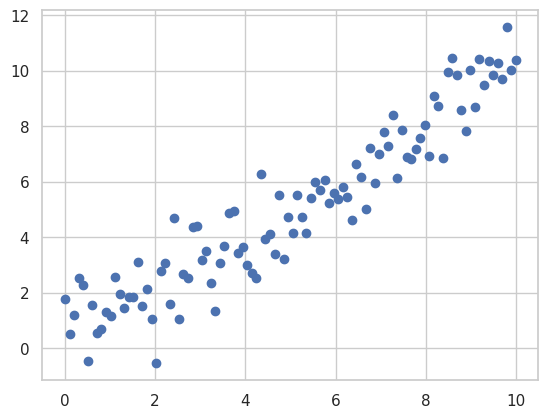

In [107]:
np.random.seed(0)
x = np.linspace(0,10,100)
y = x + np.random.normal(0,1,100)
plt.scatter(x,y)
plt.show()

## 2. Independent - if two variable is independent :-
$
\huge
\begin{bmatrix}
+ve & \approx 0 \\
\\ \approx 0 & \approx 0
\end{bmatrix}
$

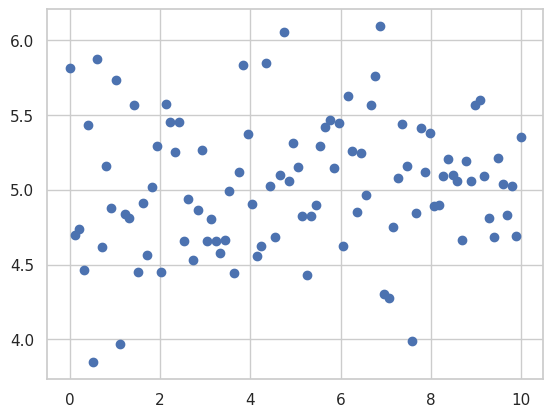

In [105]:
np.random.seed(1)
x = np.linspace(0,10,100)
y = np.random.normal(5,0.5,100)
plt.scatter(x,y)
plt.show()

## less variance on y-axis but high variance on x-axis

## 3. Dependent (but on negative side) - if two var is independent:-
$
\huge
\begin{bmatrix}
+ve & -ve \\
\\ -ve & +ve
\end{bmatrix}
$
## Good variance on both axis

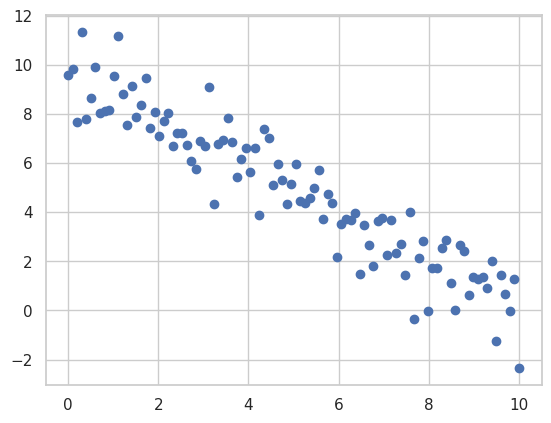

In [106]:
np.random.seed(2)
x = np.linspace(0,10,100)
y = 10 - x + np.random.normal(0,1,100)
plt.scatter(x,y)
plt.show()

## 4. Independent - (less variance on X-axis but high variance on y-axis):-
$
\huge
\begin{bmatrix}
\approx 0 & \approx 0 \\
\\ \approx 0 & +ve
\end{bmatrix}
$

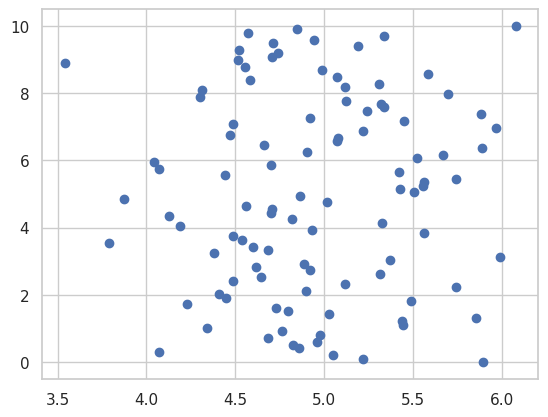

In [108]:
np.random.seed(3)
x = np.random.normal(5,0.5,100)
y = np.linspace(0,10,100)
plt.scatter(x,y)
plt.show()

## Independent -(kind of matrix which is desired)
$
\huge
\begin{bmatrix}
+ve & 0 \\
\\ 0 & +ve
\end{bmatrix}
$

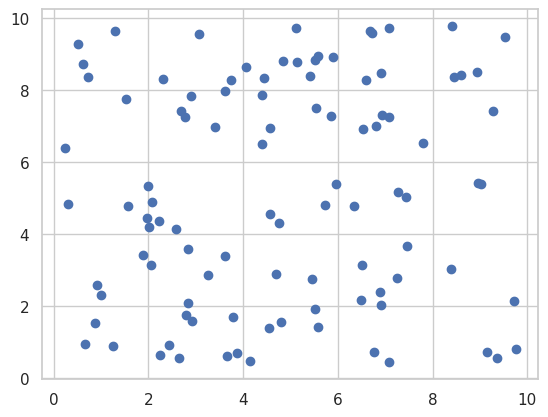

In [109]:
np.random.seed(3)
x = np.random.uniform(0,10,100)
y = np.random.uniform(0,10,100)
plt.scatter(x,y)
plt.show()

## So as you understood **Covariance matrix** now lets understand **pearson correlation Test**

## So **Pearson correlation** test is used to test whether there is a **significant relationship (correlation)** between two random variables, whether positive or negative.
## This correlation can vary acc to a condition whether a graph is positive and negative 
## lets understand this visually

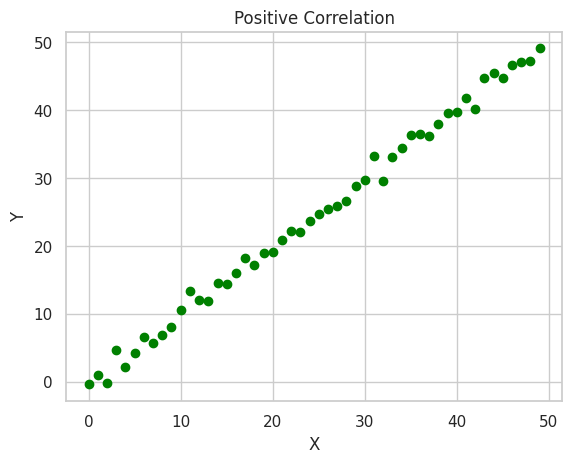

In [116]:
np.random.seed(2)
x = np.arange(50)

y_pos = x + np.random.normal(0, 1, 50)
plt.scatter(x, y_pos, color='green')
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## This graph shows strong positive correlation between X and Y:- means
$
\huge
x \propto y
$

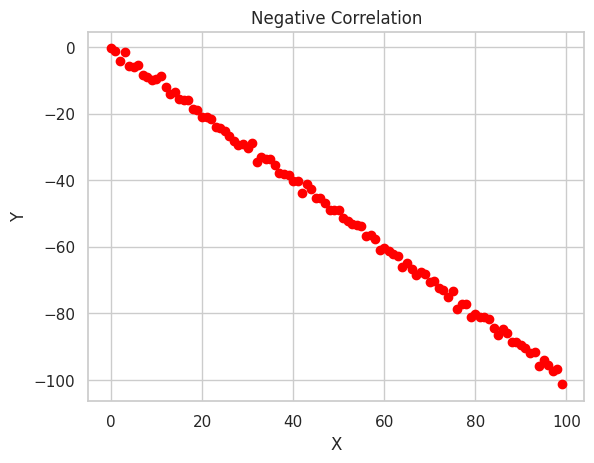

In [118]:
np.random.seed(2)
x = np.arange(100)
y_neg = -x + np.random.normal(0, 1, 100)
plt.scatter(x, y_neg, color='red')
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## This graph shows **strong negative correlation** means
$
\huge
x \propto 1/y
$

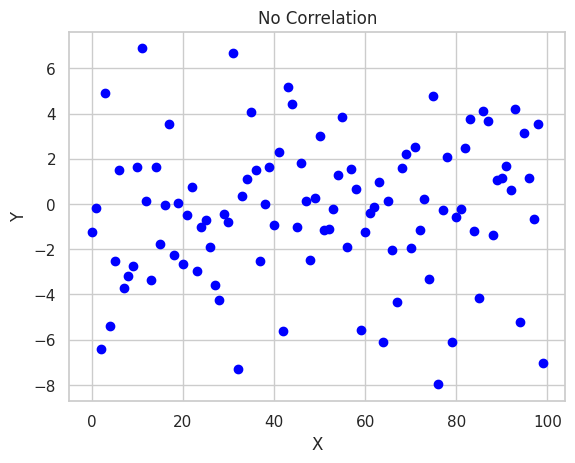

In [120]:
np.random.seed(2)
x = np.arange(100)
y_none = np.random.normal(0, 3, 100)
plt.scatter(x, y_none, color='blue')
plt.title('No Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Here you can see no correlation between these two variables hence **Poor correlation**

## Another thing is the **strength of relationship between two random variables is quantified by another descriptive statistics called Covariance.
## But computing covariance alone is not going to help much beacuse **covariance varies between negative infinity to positive infinity.** Therefore it is very difficult to tell **the strength of relationship between two random variables as the covariance is the measure without any scale**

## It is just like saying **to tell the performance of a student just by the marks, he/she has scored but when the scale is not known, or the marks are not normalized between zero and one.**

## Therefore, if the strength of the relationship between two random variables is to be determined properly then, the **covariance must be normalized to the range of -1 to +1.**

## When the covariance is normalized, then it is called **Pearson correlation Coefficient**.
## Therefore, Pearson correlation coefficient is also called **Normalized Covariance**.
## It is a unitless quantity and **value always lie between -1 to +1**.

## When the pearson correlation coefficient, between sampled data of two random variables is computed repetatively by doing a repeated sampling, then the Sampling distribution of Pearson Correlation coefficient when get standardized **follows a Student-t Distribution**.

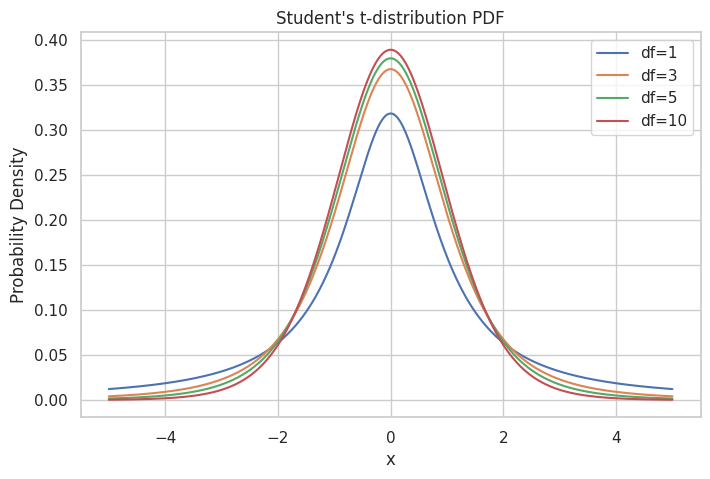

In [ ]:
from scipy.stats import t
x = np.linspace(-5, 5, 1000)
df_values = [1, 3, 5, 10]

plt.figure(figsize=(8, 5))
for df in df_values:
    plt.plot(x, t.pdf(x, df), label=f'df={df}')

plt.title("Student's t-distribution PDF")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


## Therefore, in order to perform a pearson correlation coefficient test, **t-score of Student-t Distribution is used.**

## lets understand mathematically
## So, **Covariance** is the variance calculated in teh case when 2 random variable co-exist. **Relationship between two or more things**

## You are familiar with **variance** :-
$
\huge
\text{variance} = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}
$
## lets expand it 
$
\huge
\text{variance} = \frac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (x_i - \bar{x})}{n}
$
## Covariance between x & y:-
$
\huge
\text{variance} = \frac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{n}
$

## The strength of the relationship between two random variable is to be determined properly then **the covariance has to be normalized to the range of -1 to +1**.

## Hence, **Normalized Correlation**:-
$$
\huge
-1 \leq \frac{\mathrm{Cov}{x, y}}{\sqrt{\sigma_x^2 \cdot \sigma_y^2}} \leq +1 \qquad \sigma_x \cdot \sigma_y \geq |\mathrm{cov}(x, y)|
$$
## This is what is called **Pearson Correlation Coefficient**.